In [2]:
import numpy as np

# Algorithm:

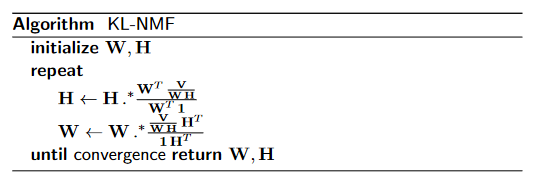

source: https://ccrma.stanford.edu/~njb/teaching/sstutorial/part2.pdf

# Decomposition: $V = WH$

$V ∈ R^{F \times T}$ - original non-negative data 

$W ∈ R^{F \times K}$ - matrix of basis vectors, dictionary elements. Not orthonormal, but commonly normalized to one

$H ∈ R^{K \times T}$ - matrix of activations, weights, or gains

In [4]:
def NMF(V, K, max_iter=1000, eps=0.0001):
    F, T = V.shape 
    W = np.random.rand(F, K)
    H = np.random.rand(K, T)
    
    ONES = np.ones((F, T))
    
    for i in range(max_iter):
        # update activations
        H *= (W.conj().transpose() * (V / (matrixmultiply(W, H) + eps))) / (W.conj().transpose() * ONES) 
        # update dictionary elements
        W *= (V.conj().transpose() * (V / (matrixmultiply(W, H) + eps) * H.conj().transpose())) / (ONES * H.conj().transpose()) 
    
    # normalize to sum to 1
    sumW = np.sum(W)
    W = matrixmultiply(W, np.diag(1/sumW))
    H = matrixmultiply(np.diag(sumW), H)
    return W, H